# In Class Assigment - Solutions

**Introduction:**
Elevate your data visualization skills using Python's plotting libraries. Visualization is crucial for insights and communication in data-related fields.

**Purpose:**
Enhance your skills by practicing varius plotting types and methods. Create engaging visuals that convey data's essence effectively.

**Instructions:**
1. **Setup:** Install Python and plotting libraries.
2. **Exercises:** Each focuses on a plot type or method.
3. **Hands-On:** Modify examples, experiment, and learn.
4. **Learn Effectively:** Understand through active practice and exploration.

Master data visualization through hands-on plotting exercises and open new doors to data interpretation and presentation!

## (1) Lets do some data analysis on the `Planets` dataset

Complete the following script using seaborn. 

There are many ways to approach a data analysi and typically you will rely on multiple methods. Really it depends on the data, what trends your looking for, and what your advisor wants! The below srcipt shows the basics and one general approach you take to get started. 

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Load the planets dataset
planets = sns.load_dataset("planets")

# Display basic information about the dataset
print(planets.head())
print(planets.info())

            method  number  orbital_period   mass  distance  year
0  Radial Velocity       1         269.300   7.10     77.40  2006
1  Radial Velocity       1         874.774   2.21     56.95  2008
2  Radial Velocity       1         763.000   2.60     19.84  2011
3  Radial Velocity       1         326.030  19.40    110.62  2007
4  Radial Velocity       1         516.220  10.50    119.47  2009
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1035 entries, 0 to 1034
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   method          1035 non-null   object 
 1   number          1035 non-null   int64  
 2   orbital_period  992 non-null    float64
 3   mass            513 non-null    float64
 4   distance        808 non-null    float64
 5   year            1035 non-null   int64  
dtypes: float64(3), int64(2), object(1)
memory usage: 48.6+ KB
None


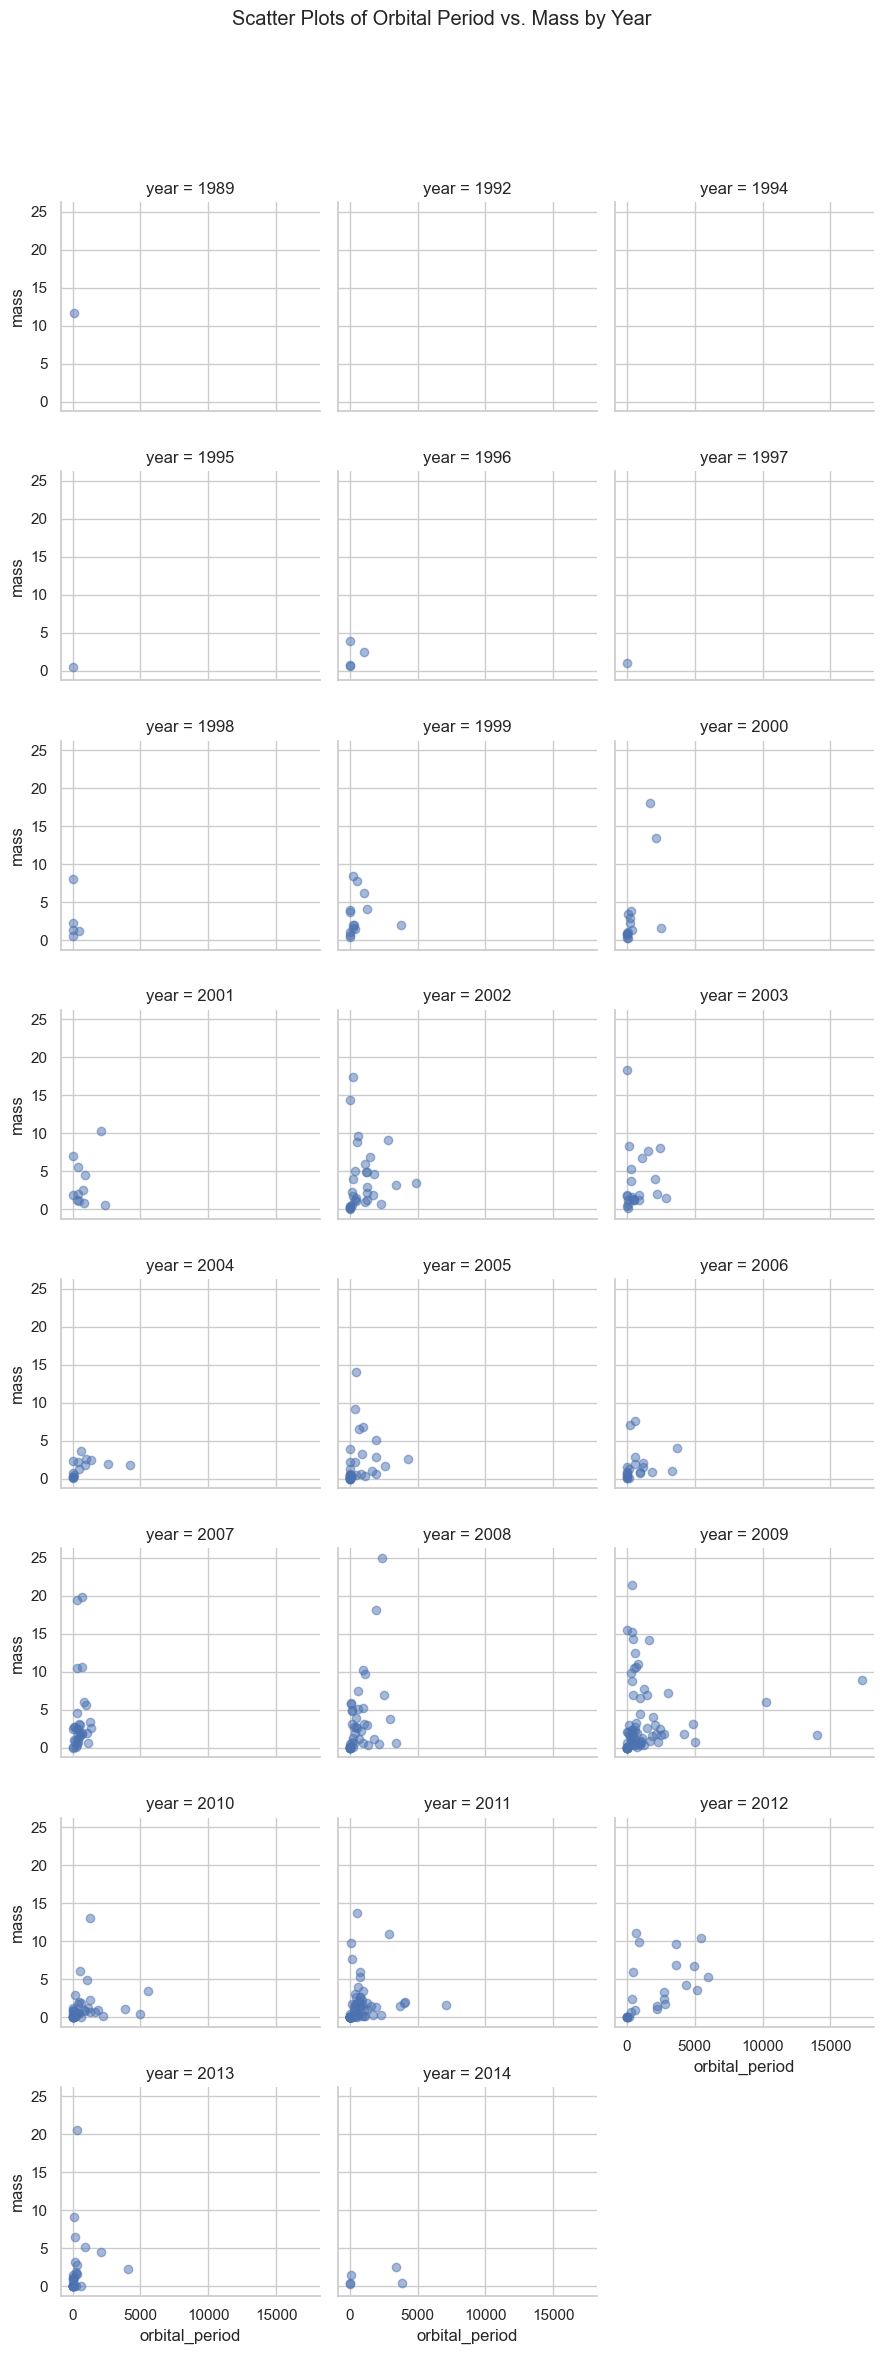

In [23]:
# Set up Seaborn style
sns.set(style="whitegrid")

# Create subplots using Seaborn FacetGrid
g = sns.FacetGrid(planets, col="year", col_wrap=3)
g.map(plt.scatter, "orbital_period", "mass", alpha=0.5)

# Add titles and adjust spacing
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle("Scatter Plots of Orbital Period vs. Mass by Year")
# Show the plots
plt.show()

In [ ]:
sns.histplot(data )

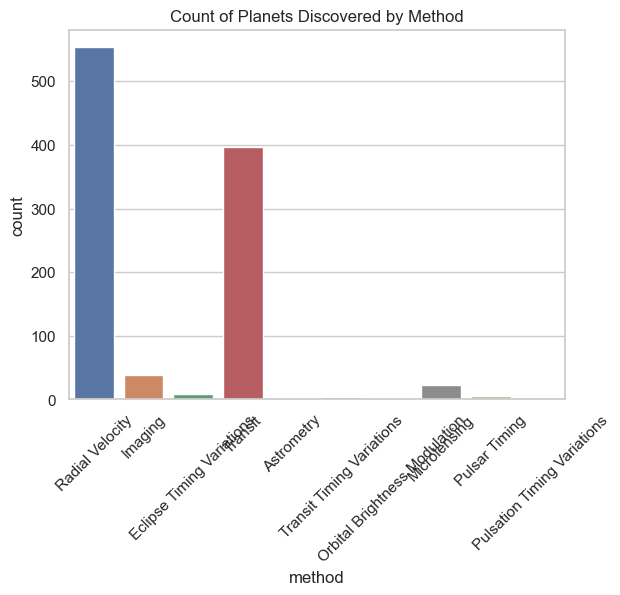

In [24]:
# Create a histogram of planet discovery methods
sns.countplot(data=planets, x='method')
plt.xticks(rotation=45)
plt.title("Count of Planets Discovered by Method")
plt.show()

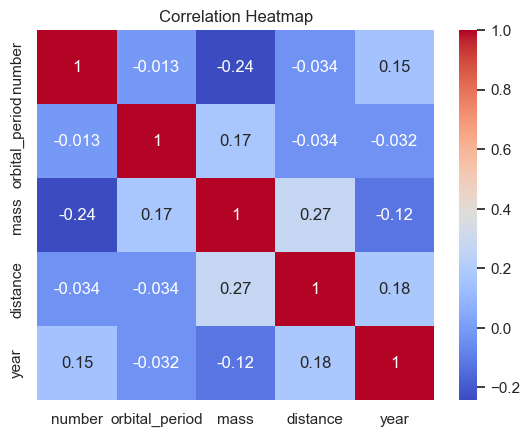

In [25]:
# Create a heatmap of correlations between numerical features
correlation_matrix = planets.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# (2) Monte Carlo Simulation of a Roulette Game

In this simulation, we consider a simplified version of roulette with a single-zero wheel. The target_number variable represents the number the player bets on. The simulation runs num_simulations simulations, with each simulation consisting of num_spins spins of the roulette wheel. The player bets the same bet_amount on each spin.

The bet_outcome function determines whether the player wins the bet for a single spin based on the bet type, which can be a specific number, red/black, odd/even, etc. The payouts for the different bet types are not considered in this simplified version.

Here are the rules: 

1. Betting on a Number ('number' bet type):
    - The target number to bet on is set to target_number = 17.
    - If the spin result matches the target_number, the bet is considered a win, and the player receives a payout of 36 times the bet amount (36 * bet_amount).

2. Betting on Red ('red' bet type):
    - If the spin result is an odd number (excluding 0) and is therefore considered a red number, the bet is considered a win.
    - If the spin result is even or 0, the bet is a loss.

3. Betting on Black ('black' bet type):
    - If the spin result is an even number (excluding 0) and is therefore considered a black number, the bet is considered a win.
    - If the spin result is odd or 0, the bet is a loss.

4. Betting on Odd ('odd' bet type):
    - If the spin result is an odd number (including both odd and even odd numbers), the bet is considered a win.
    - If the spin result is even, the bet is a loss.

5. Betting on Even ('even' bet type):
    - If the spin result is an even number (including both odd and even even numbers), the bet is considered a win.
    - If the spin result is odd or 0, the bet is a loss.


This simulation should assume a simplified version of roulette. If we wanted to design a more realistic one, we would have to  can consider real-world casino rules and payout schemes. For this assigment lets stick to simplicty and plot the results! Does the house always win??


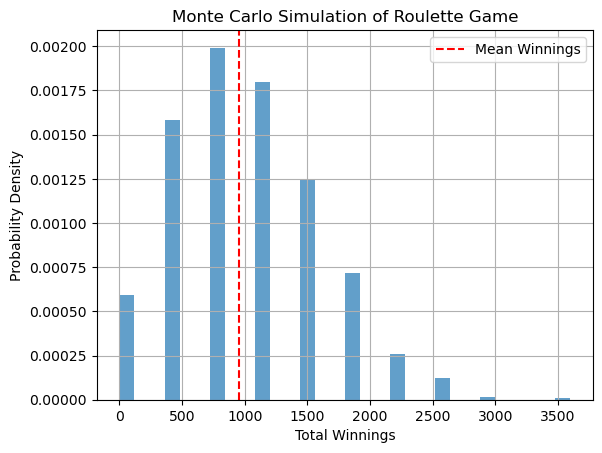

Estimated Mean Winnings: $957.24
So on average, I can spend $1700 for 100 plays and net $-940.24. 
 The house always wins!


In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
num_simulations = 1000  # Number of Monte Carlo simulations
num_spins = 100        # Number of spins in each simulation
bet_amount = 10        # Amount of money bet on each spin
target_number = 17     # Number to bet on (e.g., red/black, odd/even)

# simulate one spin of the roulette wheel
def spin_roulette_wheel():
    return np.random.randint(0, 37)  # 0-36 represent the numbers on the wheel

# determine the outcome of a bet on a single spin
def bet_outcome(spin_result, bet_type):
    if bet_type == 'number':
        return spin_result == target_number
    elif bet_type == 'red':
        return spin_result % 2 == 1 and spin_result != 0
    elif bet_type == 'black':
        return spin_result % 2 == 0 and spin_result != 0
    elif bet_type == 'odd':
        return spin_result % 2 == 1
    elif bet_type == 'even':
        return spin_result % 2 == 0 and spin_result != 0

    
# Monte Carlo sim
results = []
for _ in range(num_simulations):
    total_winnings = 0
    for _ in range(num_spins):
        spin_result = spin_roulette_wheel()
        if bet_outcome(spin_result, 'number'):
            total_winnings += 36 * bet_amount  # 36:1 payout for betting on a single number
    results.append(total_winnings)

# Calculate the mean winnings
mean_winnings = np.mean(results)

# Plot the histogram of winnings
plt.hist(results, bins=30, density=True, alpha=0.7)
plt.axvline(x=mean_winnings, color='r', linestyle='--', label='Mean Winnings')
plt.xlabel('Total Winnings')
plt.ylabel('Probability Density')
plt.title('Monte Carlo Simulation of Roulette Game')
plt.legend()
plt.grid(True)
plt.show()

print(f"Estimated Mean Winnings: ${mean_winnings:.2f}")
print(f'So on average, I can spend ${target_number*num_spins} for {num_spins} plays and net ${target_number -mean_winnings}. \n The house always wins!')

## (3) Exploring 3D Visualizations with Matplotlib

Here you will be introduced to creating 3D visualizations using Python's Matplotlib library. This will introduce you to the fundamentals of 3D visualization, including creating line plots, surface plots, and wireframes. 


You will use the following equations for the Torus plot. 

\begin{align*}
x(u, v) &= (R + r \cos(v)) \cos(u) \\
y(u, v) &= (R + r \cos(v)) \sin(u) \\
z(u, v) &= r \sin(v)
\end{align*}

Please complete the script and attempt the plot with the `.plot_wireframe` method.

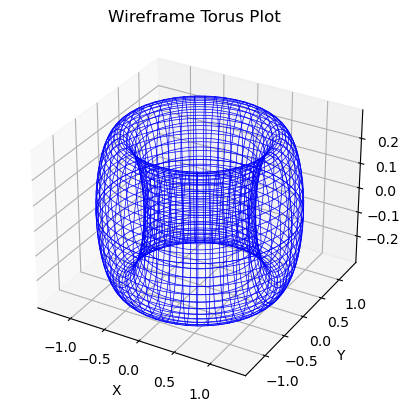

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Create data points for a torus
u = np.linspace(0, 2 * np.pi, 100)
v = np.linspace(0, 2 * np.pi, 100)

u, v = np.meshgrid(u, v)
R = 1  # Major radius
r = 0.3  # Minor radius

x = (R + r * np.cos(v)) * np.cos(u)
y = (R + r * np.cos(v)) * np.sin(u)

z = r * np.sin(v)

# Create a figure and 3D axes
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot a wireframe surface of the torus
ax.plot_wireframe(x, y, z, color='b', linewidth=0.5)

# Customize the plot
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Wireframe Torus Plot')

# Show the plot
plt.show()




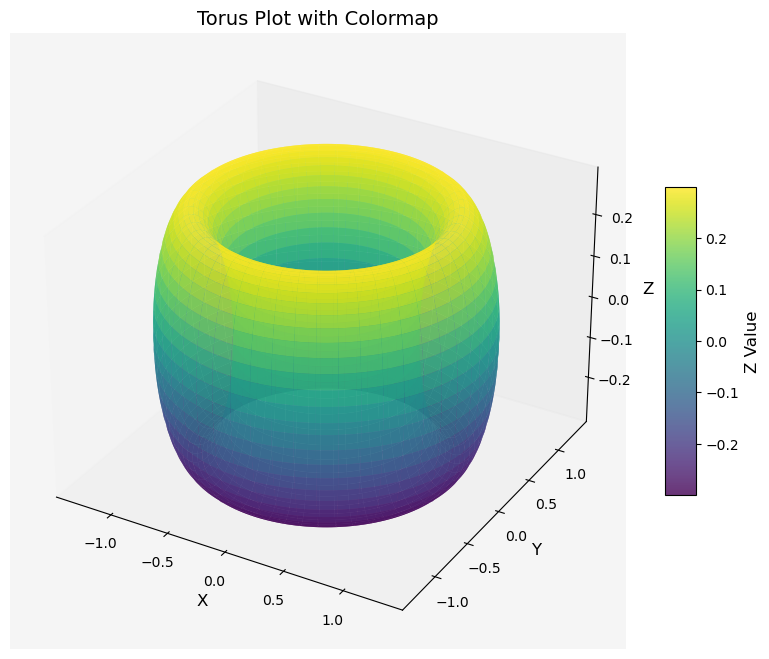

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# create data points for a torus
u = np.linspace(0, 2 * np.pi, 200)
v = np.linspace(0, 2 * np.pi, 200)

u, v = np.meshgrid(u, v)
R = 1  # Major radius
r = 0.3  # Minor radius

x = (R + r * np.cos(v)) * np.cos(u)
y = (R + r * np.cos(v)) * np.sin(u)
z = r * np.sin(v)

# create a figure and 3D axes
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# plot a surface of the torus with colormap
surf = ax.plot_surface(x, y, z, cmap='viridis', edgecolor='none', alpha=0.8)

colorbar = fig.colorbar(surf, ax=ax, shrink=0.5, aspect=10)
colorbar.set_label('Z Value', fontsize=12)

# customize the plot
ax.set_xlabel('X', fontsize=12)
ax.set_ylabel('Y', fontsize=12)
ax.set_zlabel('Z', fontsize=12)
ax.set_title('Torus Plot with Colormap', fontsize=14)
ax.grid(False)

# set background color
ax.set_facecolor('whitesmoke')

# remove axes spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

# adjust tick label size
ax.tick_params(axis='both', which='major', labelsize=10)

# rotate view for better perspective
#ax.view_init(elev=20, azim=40)

# show the plot
plt.show()
